PlantDiseaseNN made by jinu

In [ ]:
!pip install torchvision
!pip install pandas seaborn matplotlib torch torchvision
!pip install kagglehub



In [2]:
#impoting the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
from torch import nn
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision import transforms # type: ignore

In [3]:
device = 'cuda' if torch.cuda.is_available() else "cpu"
device


'cpu'

In [4]:

!curl -L -o ~/content/new-plant-diseases-dataset.zip\
  https://www.kaggle.com/api/v1/datasets/download/vipoooool/new-plant-diseases-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0 2763M    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
curl: (23) client returned ERROR on write of 14437 bytes


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

c:\Users\jinuj\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\jinuj\.cache\kagglehub\datasets\vipoooool\new-plant-diseases-dataset\versions\2


In [42]:
from pathlib import Path
# data_path = Path('/content/vipoooool/new-plant-diseases-dataset/versions/2')
image_path = '/Users/jinuj/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)'
train_dir = "/Users/jinuj/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_dir = '/Users/jinuj/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_dir = Path("/Users/jinuj/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/test")

In [7]:
train_data = datasets.ImageFolder(root=train_dir,transform=transforms.ToTensor())
valid_data = datasets.ImageFolder(root=valid_dir,transform=transforms.ToTensor())

In [ ]:
class_names = train_data.classes
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

Checking for class imbalances

In [9]:
import os
len(os.listdir(train_dir))

38

visualizing data

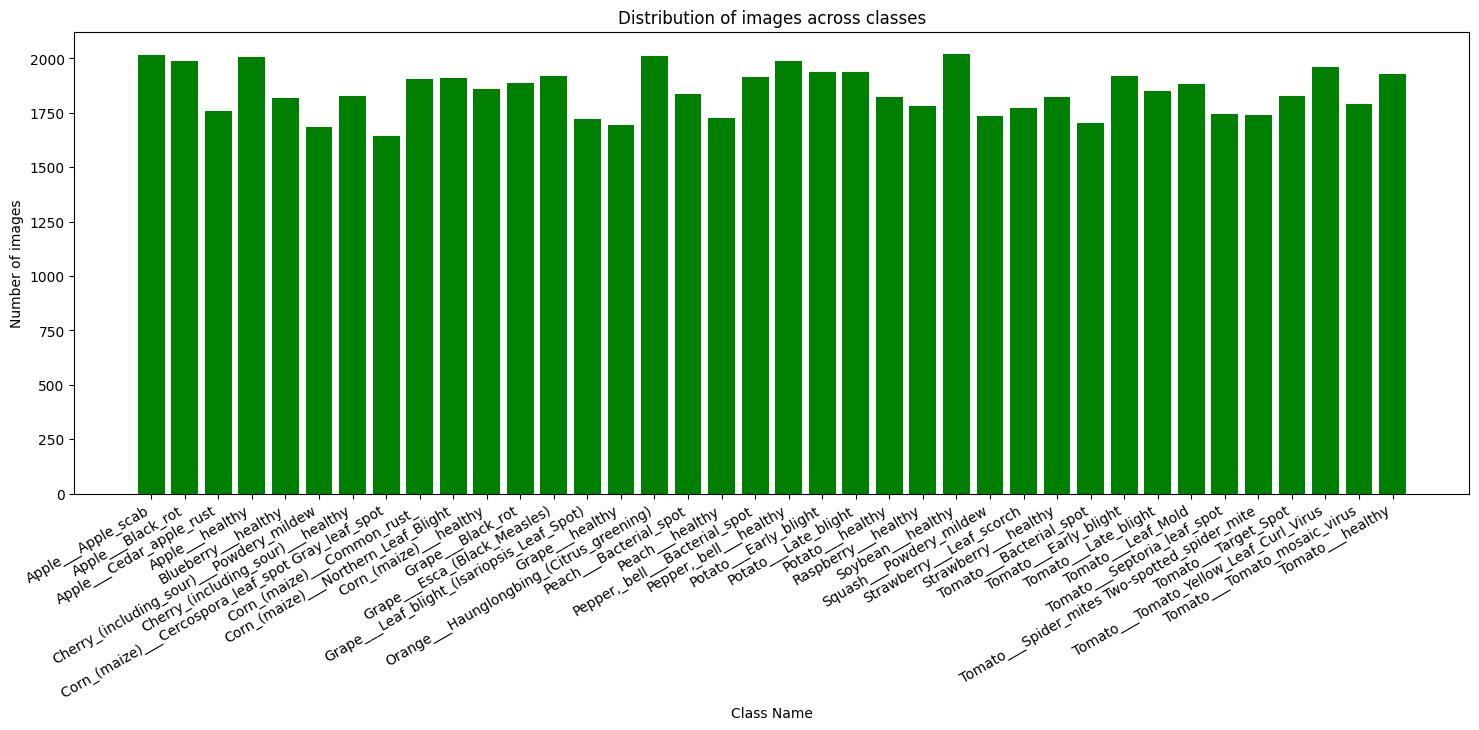

In [10]:
import os

class_counts = {}
for class_name in class_names:
    class_path = os.path.join(train_dir,class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))
classes = list(class_counts.keys())
counts = list(class_counts.values())

plt.figure(figsize=(18,6))
plt.bar(classes,counts,color='green')
plt.xlabel('Class Name')
plt.ylabel('Number of images')
plt.title("Distribution of images across classes")
plt.xticks(rotation=30,ha='right')
plt.show()

checking data

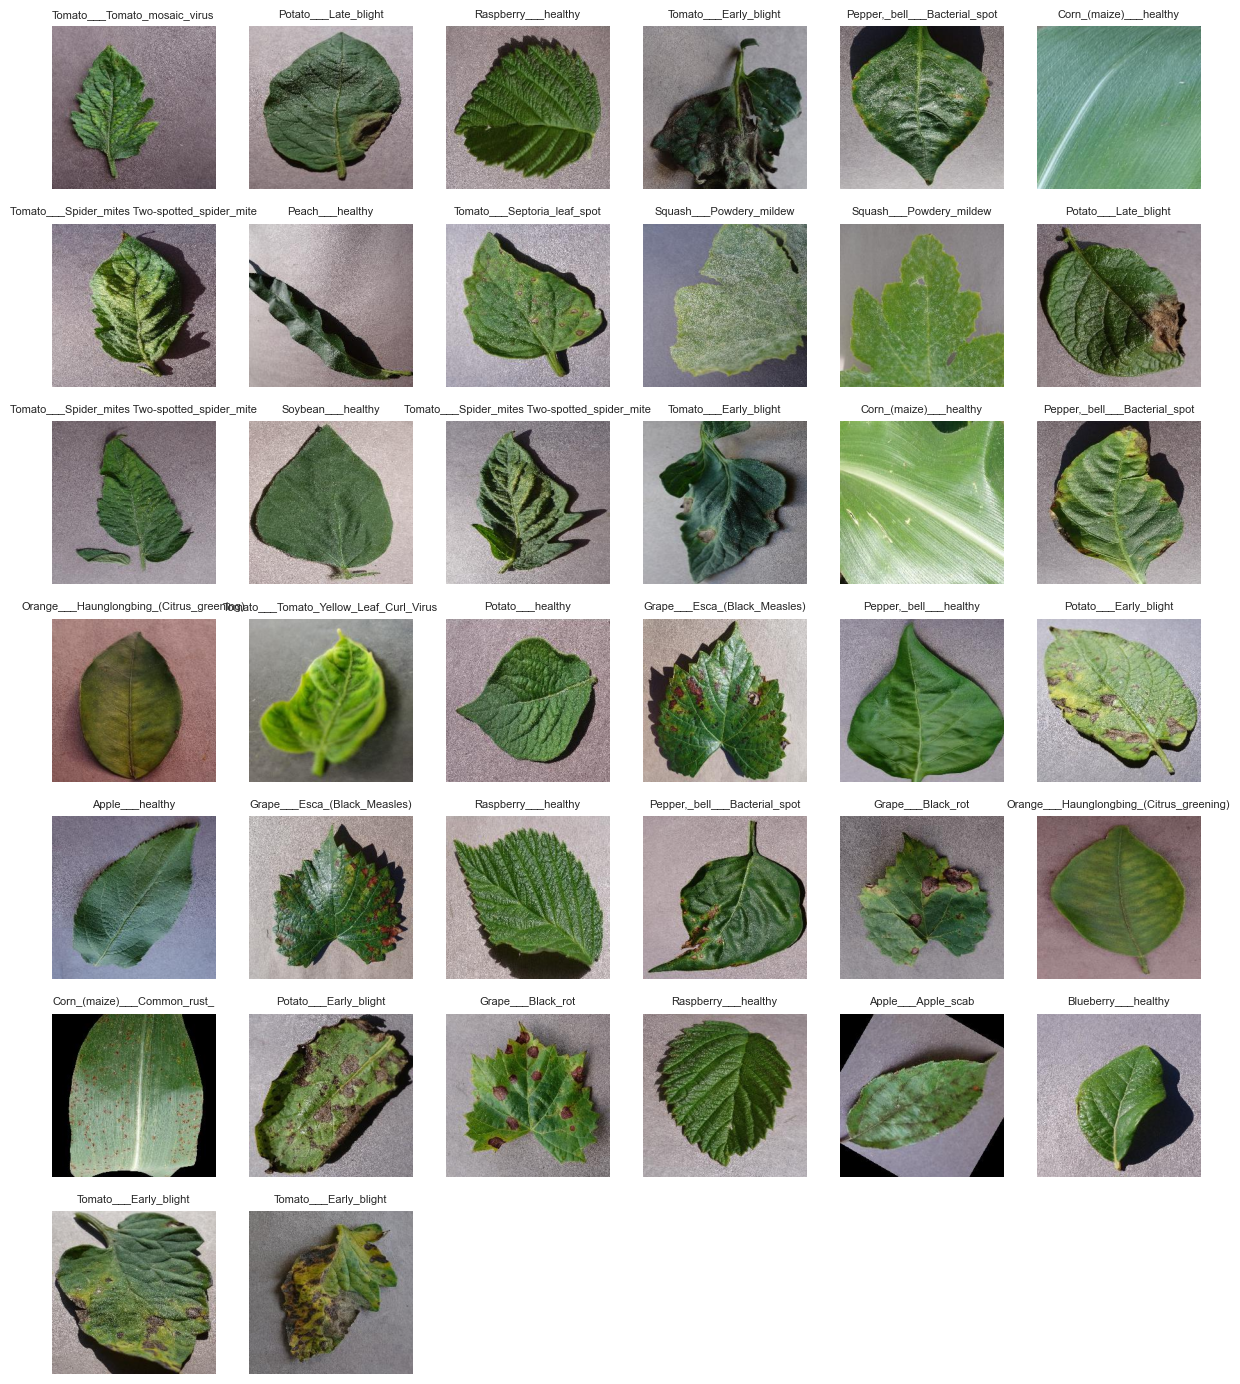

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import seaborn as sns

def visualize_dataset_images(dataset, num_images=38):
    sns.set(style="whitegrid")

    # Dynamically calculate grid dimensions
    num_cols = 6  #adjust this for a different aspect ratio
    num_rows = (num_images + num_cols - 1) // num_cols  # Ceiling division

    # Adjust figure size
    figsize = (num_cols * 2, num_rows * 2)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=figsize)

    # Load images and labels
    dataloader = DataLoader(dataset, batch_size=num_images, shuffle=True)
    images, labels = next(iter(dataloader))

    axs = axs.flatten()  # Flatten axes array for easier indexing
    for idx, img in enumerate(images):
        if idx >= num_images:
            break
        axs[idx].imshow(np.clip(img.numpy().transpose(1, 2, 0), 0, 1))
        axs[idx].axis('off')
        axs[idx].set_title(f"{dataset.classes[labels[idx]]}", fontsize=8)

    # Remove unused axes
    for idx in range(len(images), len(axs)):
        fig.delaxes(axs[idx])

    plt.tight_layout()
    plt.show()


visualize_dataset_images(train_data)

Transformation step for resizing all images to 256 * 256 for consistent dimension
Random Horizontal/Vertivcal Flips to make it robust to orientation changes  Color Jitter for making it robust against lighting conditions

In [12]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
transforms = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2,contrast=0.2),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean,std=std)
])

Training process


In [13]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,transform = transforms)
test_data = datasets.ImageFolder(root=valid_dir,transform = transforms)

In [14]:
import os
BATCH_SIZE = 128
NUM_WORKERS = os.cpu_count()

train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              num_workers=NUM_WORKERS)
test_dataloade = DataLoader(test_data,
                            batch_size = BATCH_SIZE,
                            shuffle=False,
                            num_workers = NUM_WORKERS)
train_dataloader,test_dataloade

(<torch.utils.data.dataloader.DataLoader at 0x18450890e30>,
 <torch.utils.data.dataloader.DataLoader at 0x18474cf0e60>)

In [15]:
device = 'cuda' if torch.cuda.is_available() else "cpu"
device


'cpu'

In [16]:
# creating trian_test loops
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metrics across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [17]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [18]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        # Ensure all data is moved to CPU and converted to float for storage
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [19]:
class PlantDiseaseNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels = 3,out_channels = 32,kernel_size =3,padding = 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels = 32,out_channels =64 , kernel_size = 3,padding =1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        self.block3 = nn.Sequential(
            nn.Conv2d(in_channels = 64,out_channels = 128,kernel_size = 3,padding =1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        self.block4 = nn.Sequential(
            nn.Conv2d(in_channels = 128,out_channels=256,kernel_size = 3,padding = 1 ),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        self.block5 = nn.Sequential(
            nn.Conv2d(in_channels=256,out_channels=256,kernel_size = 3,padding = 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = 8*8*256,out_features = 1024),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(in_features=1024,out_features = len(class_names))
        )
    def forward(self,x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.block5(x)
        x = self.classifier(x)
        return x

In [20]:
model = PlantDiseaseNN().to(device)

In [21]:
!pip install torchinfo

In [22]:
from torchinfo import summary
summary(model,input_size=[1,3,256,256])

Layer (type:depth-idx)                   Output Shape              Param #
PlantDiseaseNN                           [1, 38]                   --
├─Sequential: 1-1                        [1, 32, 128, 128]         --
│    └─Conv2d: 2-1                       [1, 32, 256, 256]         896
│    └─BatchNorm2d: 2-2                  [1, 32, 256, 256]         64
│    └─ReLU: 2-3                         [1, 32, 256, 256]         --
│    └─MaxPool2d: 2-4                    [1, 32, 128, 128]         --
├─Sequential: 1-2                        [1, 64, 64, 64]           --
│    └─Conv2d: 2-5                       [1, 64, 128, 128]         18,496
│    └─BatchNorm2d: 2-6                  [1, 64, 128, 128]         128
│    └─ReLU: 2-7                         [1, 64, 128, 128]         --
│    └─MaxPool2d: 2-8                    [1, 64, 64, 64]           --
├─Sequential: 1-3                        [1, 128, 32, 32]          --
│    └─Conv2d: 2-9                       [1, 128, 64, 64]          73,856
│    

In [23]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(params=model.parameters(),lr=0.0001,weight_decay=0.01)

In [24]:
from timeit import default_timer as timer
start_time = timer()
model_results = train(model=model,train_dataloader=train_dataloader,test_dataloader=test_dataloade,optimizer=optimizer,loss_fn=loss_fn,epochs=15,)
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/15 [07:33<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
import shutil


torch.save(model.state_dict(), 'model.pth')




In [31]:
saved_model = PlantDiseaseNN().to(device)
saved_model.load_state_dict(torch.load('model/model.pth', map_location=torch.device('cpu')))
saved_model.eval()

PlantDiseaseNN(
  (block1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block4): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1

In [37]:
!pip install -U scikit-learn
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import torch

def evaluate(model: torch.nn.Module,
             dataloader: torch.utils.data.DataLoader,
             loss_fn: torch.nn.Module,
             device: torch.device):
    # To store predictions and true labels for calculating the metrics
    all_preds = []
    all_labels = []

    # Variable to accumulate total correct predictions for accuracy
    correct_preds = 0
    total_preds = 0

    # Evaluate the model using the existing test_step function and collect predictions
    model.eval()  # Switch model to evaluation mode

    # Disable gradient calculation for inference
    with torch.no_grad():
        for batch, (X, y) in enumerate(dataloader):
            # Move data to the device
            X, y = X.to(device), y.to(device)

            # Get model predictions using test_step
            test_pred_logits = model(X)

            # Get predicted class labels
            test_pred_labels = test_pred_logits.argmax(dim=1)

            # Store predictions and true labels
            all_preds.extend(test_pred_labels.cpu().numpy())  # move to CPU for metrics calculation
            all_labels.extend(y.cpu().numpy())

            # Calculate correct predictions for accuracy
            correct_preds += (test_pred_labels == y).sum().item()
            total_preds += len(y)

    # Calculate accuracy
    accuracy = correct_preds / total_preds

    # Calculate the precision, recall, and f1-score
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')

    # Calculate confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    return accuracy, precision, recall, f1, cm

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.1 MB 3.0 MB/s eta 0:00:04
   ----- ---------------------------------- 1.6/11.1 MB 3.2 MB/s eta 0:00:03
   -------- ------------------------------- 2.4/11.1 MB 3.0 MB/s eta 0:00:03
   ----------- ---------------------------- 3.1/11.1 MB 3.4 MB/s eta 0:00:03
   ------------- -------------------------- 3.7/11.1 MB 3.0 MB/s eta 0:00:03
   --------------- ------------------------ 4.2/11.1 MB 3.0 MB/s eta 0:00:03
   ---------------- ----------------------- 4.5/11.1 MB 2.9 MB/s eta 0:00:03
   ---------------- ----------------------- 4.7/11.1 MB 2.7 MB/s eta 0:00:03
   ----------------- ---------------------- 5.0/11.1 MB 2.5 MB/s eta 0:00:03
   ----------------- --------------

In [ ]:
accuracy, precision, recall, f1, cm = evaluate(saved_model, test_dataloade, loss_fn, device)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

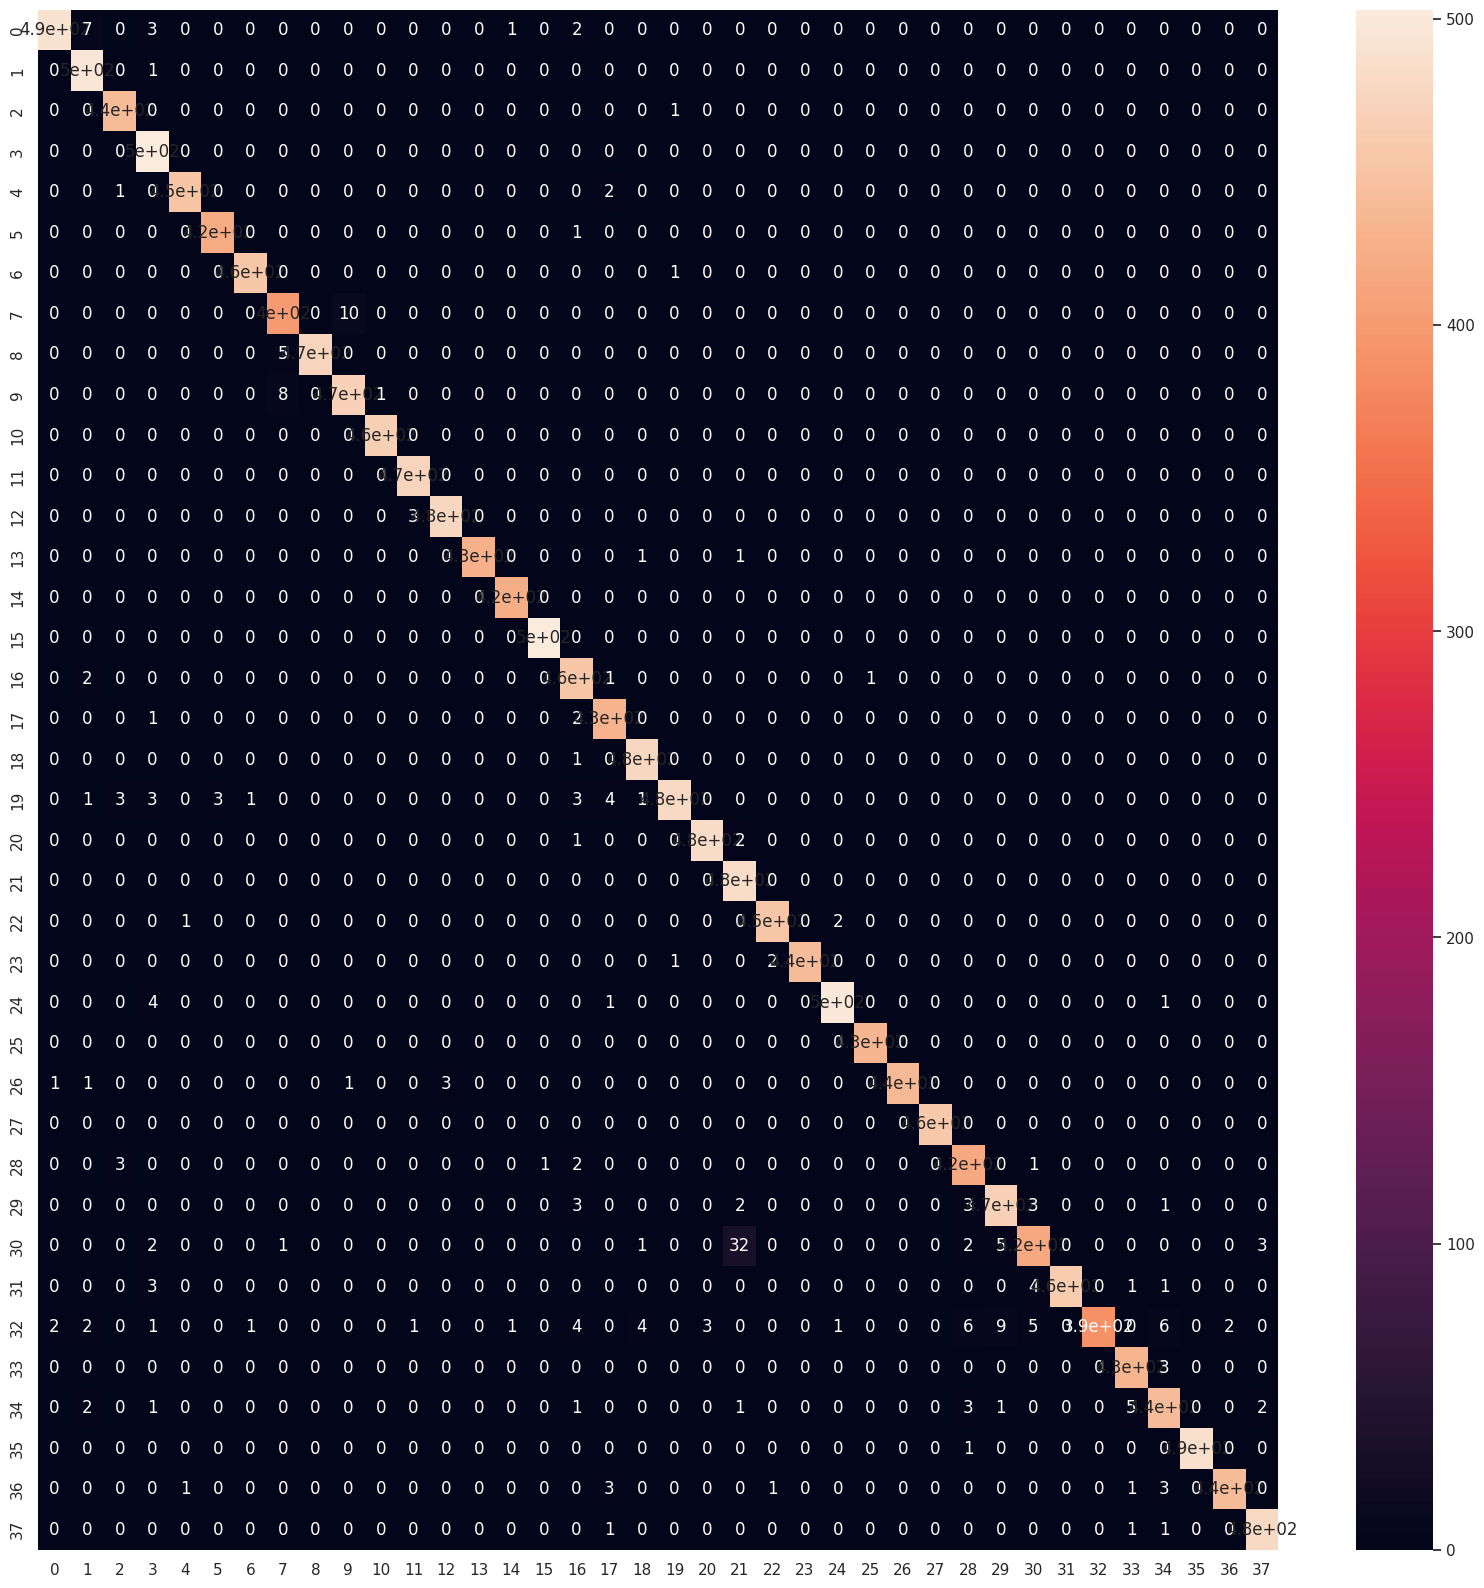

In [ ]:
plt.figure(figsize=(20,20))
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
sns.heatmap(cm,annot=True)
plt.show()

In [1]:
import torch
import os
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


mean = [0.485, 0.456, 0.406]  
std = [0.229, 0.224, 0.225]


image_size = (256, 256)
preprocess = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

 # Replace with actual class names

# udjast the path image path
image_path = "image copy.png"

# here the image gets loaded ok
img = Image.open(image_path).convert('RGB')

# Preprocess the image
img_tensor = preprocess(img).unsqueeze(0).to(device)  # Add batch dimension

# Get prediction
saved_model.eval()  # Set model to evaluation mode
with torch.no_grad():
    predictions = saved_model(img_tensor)

# Get predicted class
predicted_class_idx = torch.argmax(predictions, dim=1).item()
predicted_label = class_names[predicted_class_idx]  # Map index to class name

# Display the image with prediction
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()


NameError: name 'saved_model' is not defined